# Importing libraries

link to the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [39]:
df=pd.read_csv("heart.csv")

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Preprocessing

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

replacing non numeric with numeric features

In [12]:
print(f'{df["ChestPainType"].unique()=}\n')
print(f'{df["RestingECG"].unique()=}\n')
print(f'{df["ExerciseAngina"].unique()=}\n')
print(f'{df["ST_Slope"].unique()=}v')

df["ChestPainType"].unique()=array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

df["RestingECG"].unique()=array(['Normal', 'ST', 'LVH'], dtype=object)

df["ExerciseAngina"].unique()=array(['N', 'Y'], dtype=object)

df["ST_Slope"].unique()=array(['Up', 'Flat', 'Down'], dtype=object)v


all of them are small enough to be replaced so lets encode them

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encode=LabelEncoder()

In [40]:
df["ChestPainType"]=encode.fit_transform(df["ChestPainType"])
df["RestingECG"]=encode.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=encode.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=encode.fit_transform(df["ST_Slope"])
df["Sex"]=encode.fit_transform(df["Sex"])

In [41]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


*Data analysis is done in the data analysis repository*

Here I just extracted some important data

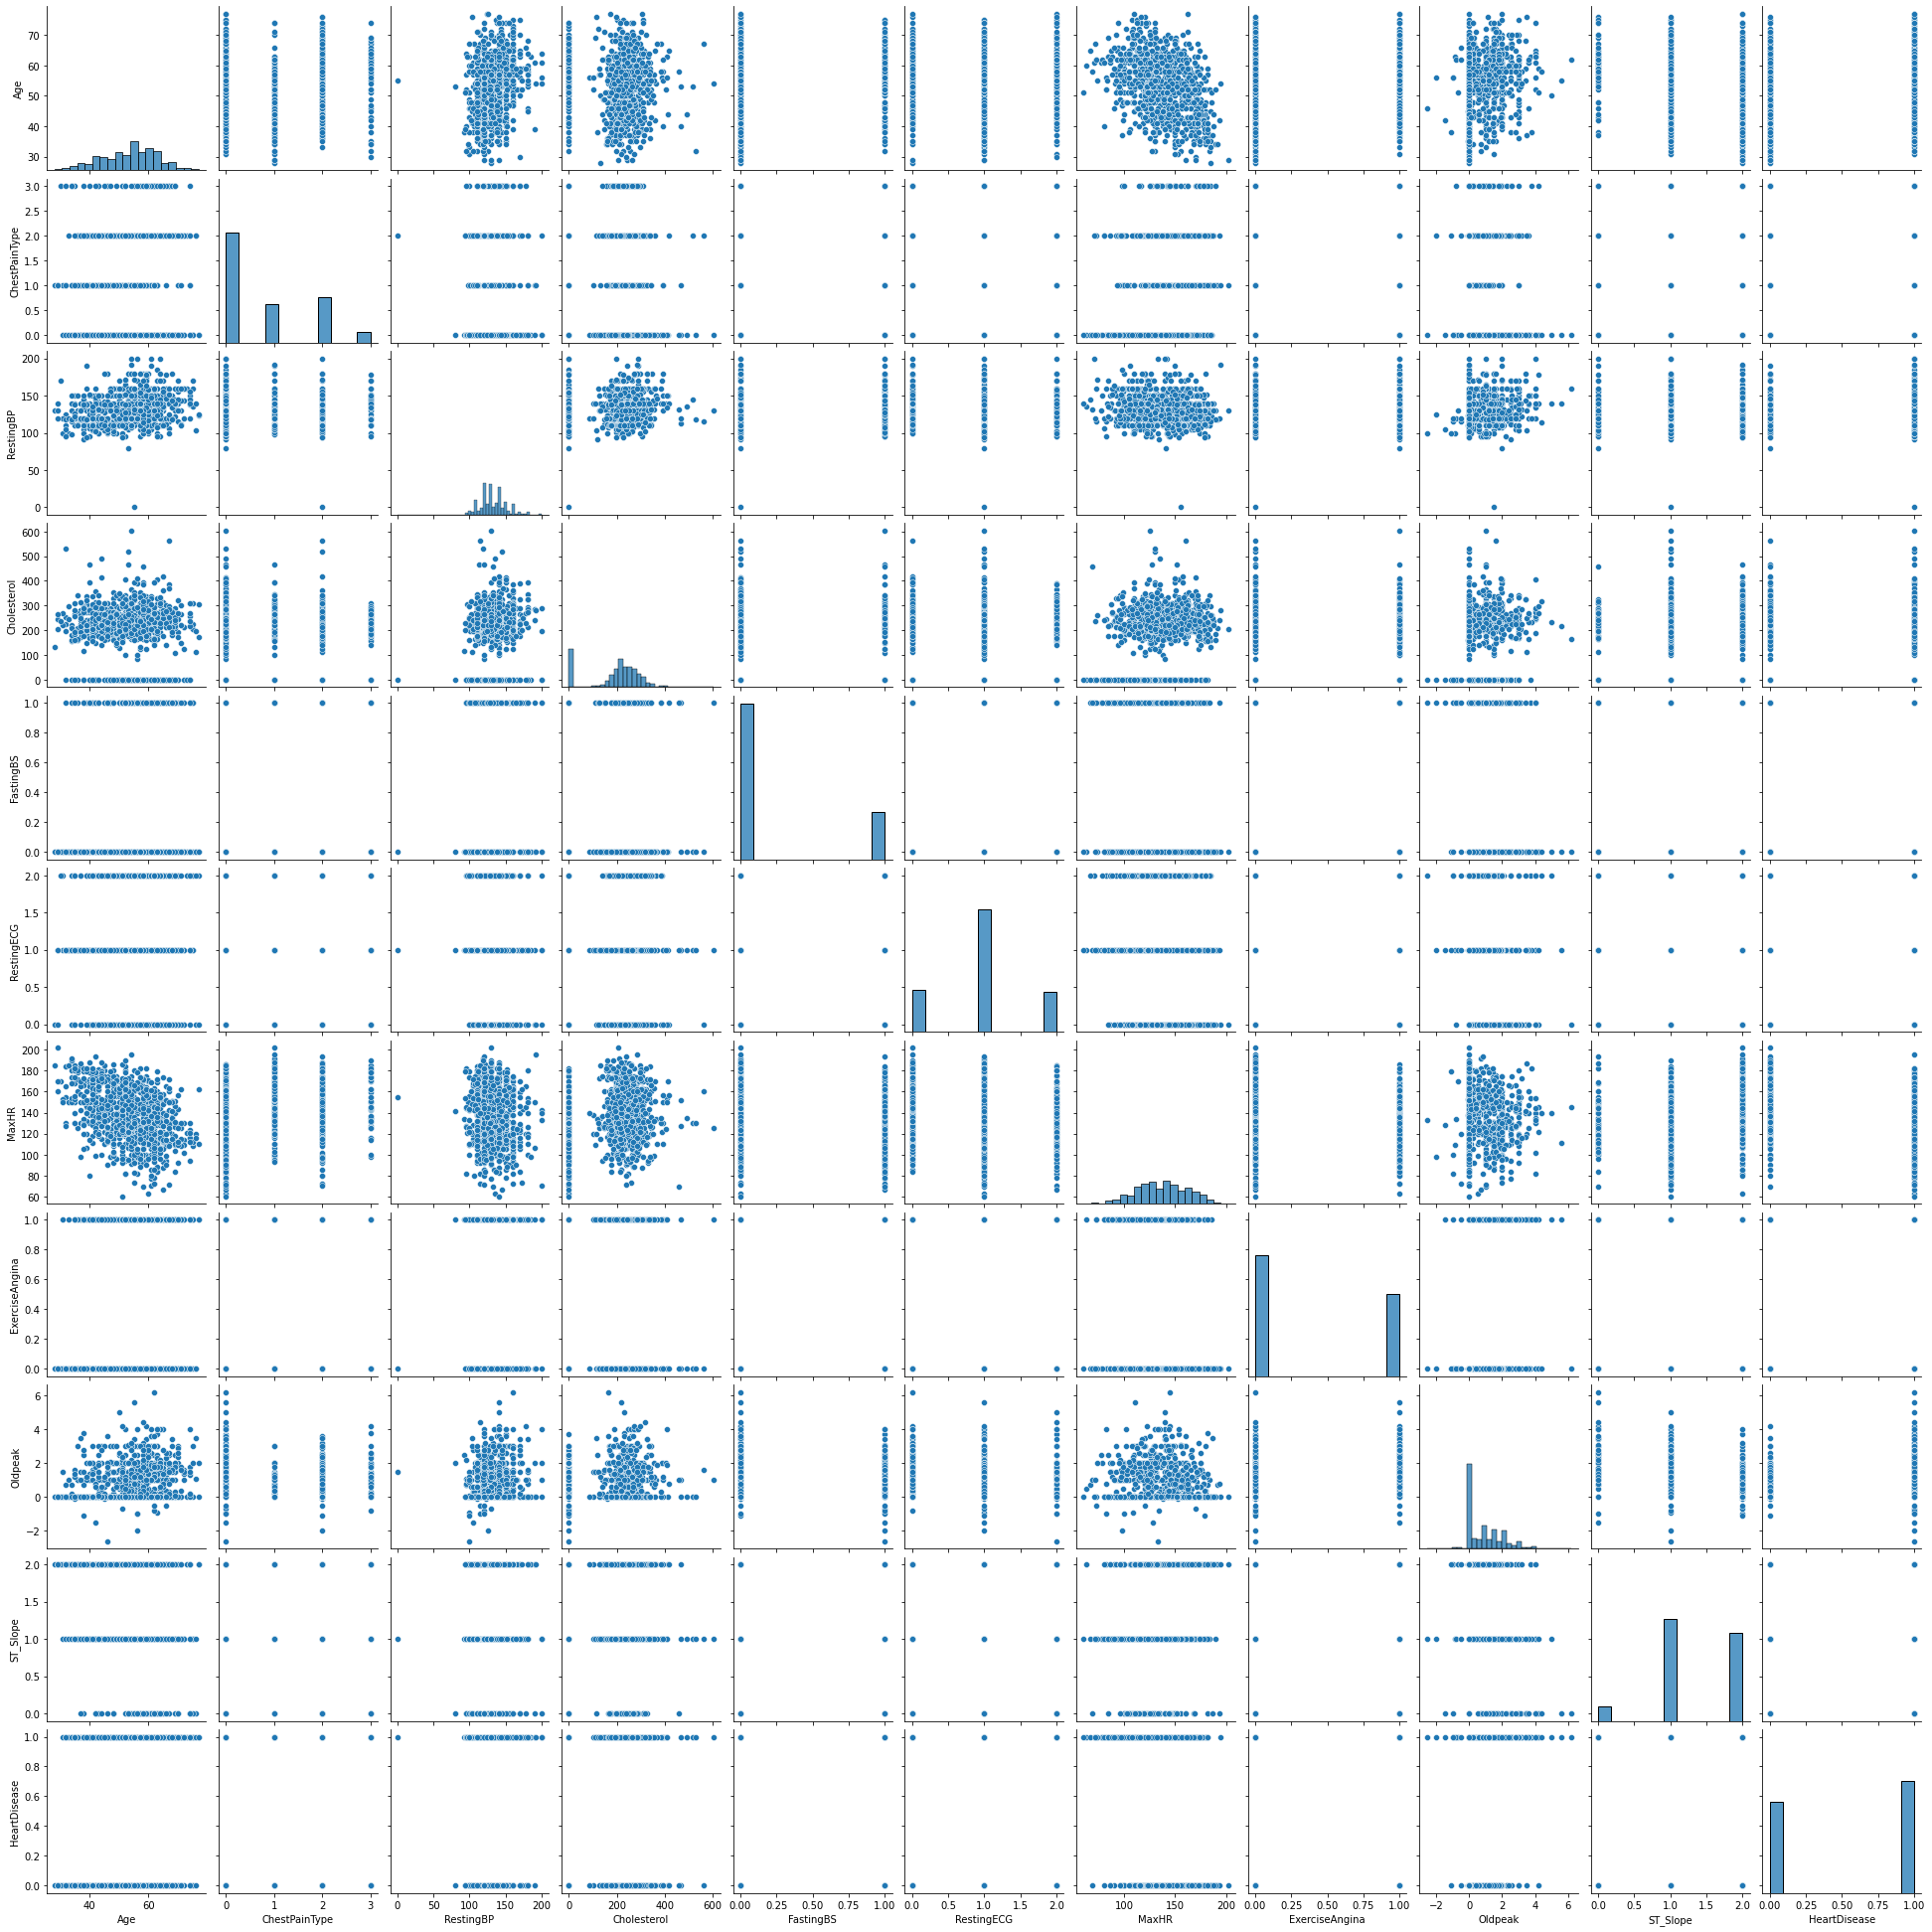

In [18]:
sns.pairplot(df)

**Removing outliers**

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

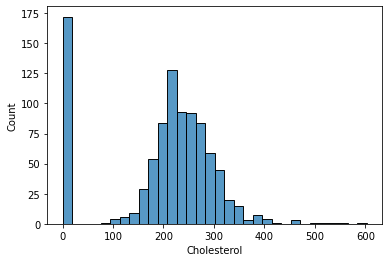

In [50]:
sns.histplot(df["Cholesterol"])

In [51]:
df=df[(df["Cholesterol"]>80) & (df["Cholesterol"]<450)]

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

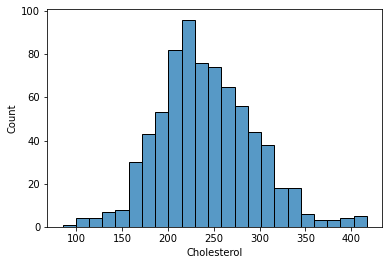

In [52]:
sns.histplot(df["Cholesterol"])

**correlation of parameters**

<AxesSubplot:>

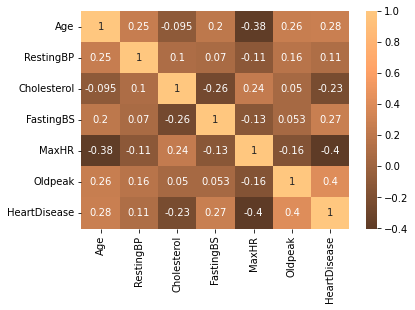

In [27]:
sb.heatmap(data.corr(),center=0,annot=True,cmap="copper")

**Scaling data**

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
mms=MinMaxScaler()
df=pd.DataFrame(mms.fit_transform(df),columns=df.columns)

In [71]:
x=df.drop("HeartDisease",axis=1)
y=df["HeartDisease"]

In [70]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.444444,0.614458,0.0,0.5,0.770992,0.0,0.015873,1.0,0.0
1,0.428571,0.0,0.666667,0.629630,0.286145,0.0,0.5,0.648855,0.0,0.174603,0.5,1.0
2,0.183673,1.0,0.333333,0.351852,0.596386,0.0,1.0,0.206107,0.0,0.015873,1.0,0.0
3,0.408163,0.0,0.000000,0.425926,0.388554,0.0,0.5,0.282443,1.0,0.253968,0.5,1.0
4,0.530612,1.0,0.666667,0.537037,0.331325,0.0,0.5,0.389313,0.0,0.015873,1.0,0.0


# Models

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

**KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
params={"n_neighbors":[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]}

In [129]:
knn_gs=GridSearchCV(KNeighborsClassifier(),params,cv=3)

In [130]:
knn_gs.fit(x,y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                         50, 55, 60, 65, 70]})

In [131]:
print(knn_gs.best_params_)
print(knn_gs.best_score_)

{'n_neighbors': 5}
0.8252032520325203


In [132]:
knn=KNeighborsClassifier(n_neighbors=5)
knn_cvs=cross_val_score(knn,x,y,cv=3)

**Svm**

In [77]:
from sklearn.svm import SVC

In [133]:
params={"C":[1,10,100,1000,10000],
           "gamma":[1,.1,.001,.0001,.00001]}

In [134]:
svc_gs=GridSearchCV(SVC(),params,cv=3)

In [135]:
svc_gs.fit(x,y)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]})

In [136]:
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 1, 'gamma': 1}
0.8455284552845529


In [137]:
svc=SVC(C=1, gamma=1)
svc_cvs=cross_val_score(svc,x,y,cv=3)

**DTC**

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
# defining the parameters
params={ "max_depth":[1,5,10,15,20,25,30],
        "min_samples_split":[.1,.4,.8],
        "min_samples_leaf":[.1,.2,.3,.4,.5],
        "max_features":[1,3,6,9,11]}

# Search model
dtc_gs=GridSearchCV(DecisionTreeClassifier(),params,cv=3)
dtc_gs.fit(x,y)

# Results
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 0.3, 'min_samples_split': 0.8}
0.8604336043360433


In [157]:
# cross validation
dtc=DecisionTreeClassifier(max_depth=1,
                          min_samples_leaf=.2,
                          min_samples_split=.8,
                          max_features=6)
dtc_cvs=cross_val_score(dtc,x,y,cv=3)

**RFC**

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
# defining the parameters
params={"n_estimators":[100,200,300],
           "criterion":["gini","entropy"],
           "max_depth":[10,50,100],
           "max_features":['auto',"sqrt"],
           "oob_score":[True,False]}

# Search model
rfc_gs=GridSearchCV(RandomForestClassifier(),params,cv=3)
rfc_gs.fit(x,y)

# Results
print(rfc_gs.best_params_)
print(rfc_gs.best_score_)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100, 'oob_score': True}
0.856368563685637


In [158]:
# cross validation
rfc=RandomForestClassifier(criterion="gini",
                          max_depth=10,
                          max_features="sqrt",
                          n_estimators=200,
                          oob_score=True)
rfc_cvs=cross_val_score(rfc,x,y,cv=3)

**Adb**

In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [166]:
# defining the parameters
params={"n_estimators":[50,100,150,200],
    "learning_rate":[.5,.6,.4],
    "algorithm":['SAMME.R','SAMME']}

# Search model
adb_gs=GridSearchCV(AdaBoostClassifier(),params,cv=3)
adb_gs.fit(x,y)

# Results
print(adb_gs.best_params_)
print(adb_gs.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.6, 'n_estimators': 50}
0.8414634146341463


In [159]:
adb=AdaBoostClassifier(algorithm="SAMME",
                      learning_rate=.6,
                      n_estimators=50)
adb_cvs=cross_val_score(adb,x,y,cv=3)

**GB**

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [167]:
# defining the parameters
params={"loss":["exponential",'deviance'],
    "learning_rate":[0.4,.5,.6],
    "n_estimators":[50, 100, 150, 200]}

# Search model
gb_gs=GridSearchCV(GradientBoostingClassifier(),params,cv=3)
gb_gs.fit(x,y)

# Results
print(gb_gs.best_params_)
print(gb_gs.best_score_)

{'learning_rate': 0.4, 'loss': 'exponential', 'n_estimators': 50}
0.8428184281842818


In [160]:
gb=GradientBoostingClassifier(learning_rate=.4,
                             loss="exponential",
                             n_estimators=100)
gb_cvs=cross_val_score(gb,x,y,cv=3)

In [182]:
print("--------------------REPORT-------------------\n")
print("knn:")
print("gride search best parameter:"+str(knn_gs.best_params_))
print("gride search best score:"+str(knn_gs.best_score_))
print("Best RESULT: "+str(knn_cvs.max()))

print("---------------------------------------------")
print("svm:")
print("gride search best parameter:"+str(svc_gs.best_params_))
print("gride search best score:"+str(svc_gs.best_score_))
print("Best RESULT: "+str(svc_cvs.max()))

print("---------------------------------------------")
print("dtc:")
print("gride search best parameter:"+str(dtc_gs.best_params_))
print("gride search best score:"+str(dtc_gs.best_params_))
print("Best RESULT: "+str(dtc_cvs.max()))

print("---------------------------------------------")
print("rfc:")
print("gride search best parameter:"+str(rfc_gs.best_params_))
print("gride search best score:"+str(rfc_gs.best_score_))
print("Best RESULT: "+str(rfc_cvs.max()))

print("---------------------------------------------")
print("adb:")
print("gride search best parameter:"+str(adb_gs.best_params_))
print("gride search best score:"+str(adb_gs.best_score_))
print("Best RESULT: "+str(adb_cvs.max()))

print("---------------------------------------------")
print("gb:")
print("gride search best parameter:"+str(gb_gs.best_params_))
print("gride search best score:"+str(gb_gs.best_params_))
print("Best RESULT: "+str(gb_cvs.max()))

print("---------------------------------------------")

--------------------REPORT-------------------

knn:
gride search best parameter:{'n_neighbors': 5}
gride search best score:0.8252032520325203
Best RESULT: 0.8658536585365854
---------------------------------------------
svm:
gride search best parameter:{'C': 1, 'gamma': 1}
gride search best score:0.8455284552845529
Best RESULT: 0.8739837398373984
---------------------------------------------
dtc:
gride search best parameter:{'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 0.3, 'min_samples_split': 0.8}
gride search best score:{'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 0.3, 'min_samples_split': 0.8}
Best RESULT: 0.8658536585365854
---------------------------------------------
rfc:
gride search best parameter:{'criterion': 'gini', 'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100, 'oob_score': True}
gride search best score:0.856368563685637
Best RESULT: 0.9024390243902439
---------------------------------------------
adb:
gride search best parameter:{'algo

In [176]:
knn_cvs

array([0.86585366, 0.85365854, 0.75609756])

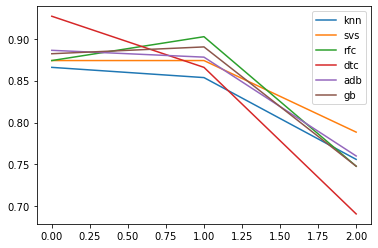

In [186]:
plt.plot(knn_cvs)
plt.plot(svc_cvs)
plt.plot(rfc_csv)
plt.plot(dtc_csv)
plt.plot(adb_cvs)
plt.plot(gb_cvs)
plt.legend(["knn","svs","rfc","dtc","adb","gb"])